# Kaggle案例泰坦尼克号生存预测分析


## 查看数据<br>
用pandas加载数据

In [3]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
data_train = pd.read_csv("Train.csv")
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

有以下这些字段<br>
PassengerId => 乘客ID<br>
Pclass => 乘客等级(1/2/3等舱位)<br>
Name => 乘客姓名<br>
Sex => 性别<br>
Age => 年龄<br>
SibSp => 堂兄弟/妹个数<br>
Parch => 父母与小孩个数<br>
Ticket => 船票信息<br>
Fare => 票价<br>
Cabin => 客舱<br>
Embarked => 登船港口

### 数据简单描述性分析

In [2]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 训练数据中总共有891名乘客，但是我们有些属性的数据不全，比如说：<br>

* Age（年龄）属性只有714名乘客有记录
* Cabin（客舱）更是只有204名乘客是已知的<br>
具体数据数值情况，我们用下列的方法，得到数值型数据的一些分布

In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


mean字段告诉我们，大概0.383838的人最后获救了，平均乘客年龄大概是29.7岁

# 通过可视化的方式深入了解数据

## 获救情况人数可视化

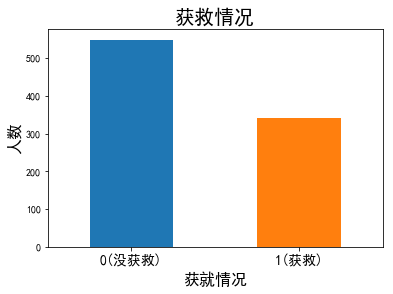

0    549
1    342
Name: Survived, dtype: int64


In [19]:
import matplotlib.pyplot as plt #绘图工具 

from pylab import mpl #显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
mpl.rcParams['axes.unicode_minus'] = False 

fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
data_train.Survived.value_counts().plot(kind='bar')
plt.title("获救情况",fontsize=20)
plt.ylabel("人数",fontsize=16)
plt.xlabel("获就情况",fontsize=16)
plt.xticks([0,1],['0(没获救)','1(获救)'], fontsize=14)
plt.xticks(rotation=0)
plt.show()
print(data_train.Survived.value_counts())


## 乘客等级分布可视化

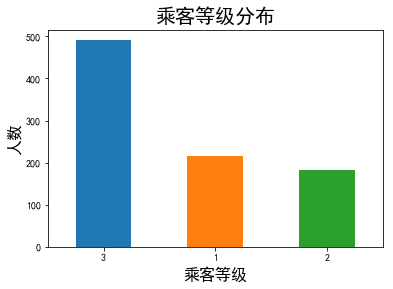

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [24]:
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel("人数",fontsize=16)
plt.xlabel("乘客等级",fontsize=16)
plt.title("乘客等级分布",fontsize=20)
plt.xticks(rotation=0)
plt.show()
print(data_train.Pclass.value_counts())

## 按年龄看获救分布可视化

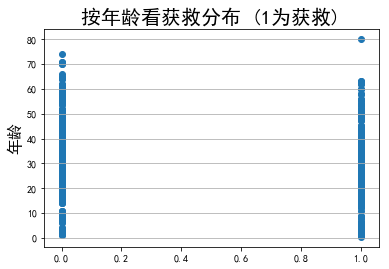

In [27]:
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel("年龄",fontsize=16)                         
plt.grid(True,axis='y') 
plt.title("按年龄看获救分布 (1为获救)",fontsize=20)
plt.show()

## 各等级的乘客年龄分布

####  kind参数——'line', 'bar', 'barh', 'kde':
密度图：与直方图相关的一种类型图，是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的，通过给plot传入参数kind = 'kde' 即可。<br>
直方图：是一种可以对值频率离散化显示的柱状图。通过调用Series.hist()方法即可创建。<br>
散布图：是观测两个一维数据序列之间关系的有效手段，使用pd.scatter_matrix()即可建立。<br>

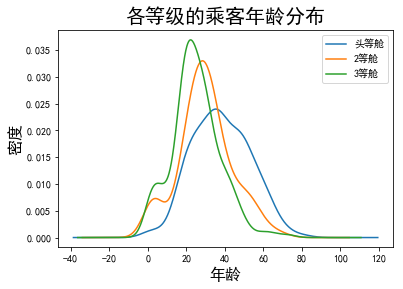

In [28]:
# 各等级的乘客年龄分布密度图
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("年龄",fontsize=16)
plt.ylabel("密度",fontsize=16) 
plt.title("各等级的乘客年龄分布",fontsize=20)
plt.legend(('头等舱', '2等舱','3等舱')) 
plt.show()

## 各登船口岸上船人数可视化

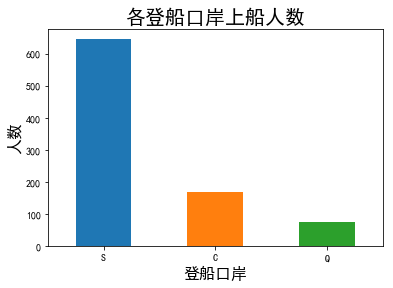

In [31]:
data_train.Embarked.value_counts().plot(kind='bar')
plt.title("各登船口岸上船人数",fontsize=20)
plt.xlabel("登船口岸",fontsize=16)
plt.ylabel("人数",fontsize=16)  
plt.xticks(rotation=0)
plt.show()

### 所以我们在图上可以看出来:<br>
* 被救的人300多点，不到半数；<br>
* 3等舱乘客非常多；遇难和获救的人年龄跨度都很广；<br>
* 3个不同的舱年龄总体趋势似乎也一致，2/3等舱乘客20岁多点的人最多，1等舱40岁左右的最多<br>
* 登船港口人数按照S、C、Q递减，而且S远多于另外俩港口。><br><br>

## 查看每一个属性与获救情况的可视化


## 各乘客等级的获救情况

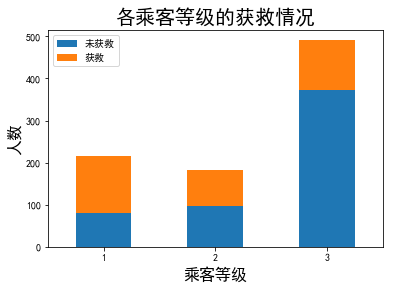

,未获救,获救
1,80,136
2,97,87
3,372,119


In [32]:
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({'获救':Survived_1, '未获救':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title("各乘客等级的获救情况",fontsize=20)
plt.xlabel("乘客等级",fontsize=16) 
plt.ylabel("人数",fontsize=16) 
plt.xticks(rotation=0)
plt.legend()
plt.show()
df
# Survived_0
# Survived_1 

## 各性别的获救情况

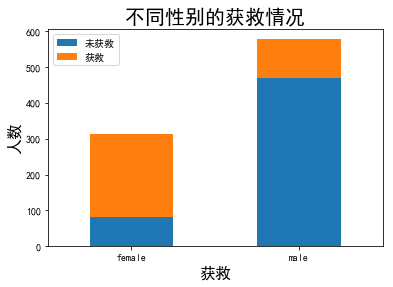

,未获救,获救
female,81,233
male,468,109


In [37]:
#看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Sex[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Sex[data_train.Survived == 1].value_counts()
df=pd.DataFrame({'获救':Survived_1, '未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("不同性别的获救情况",fontsize=20)
plt.xlabel("获救",fontsize=16) 
plt.ylabel("人数",fontsize=16)
plt.xticks(rotation=0)
plt.legend()
plt.show()
df
# Survived_m
# Survived_f

### 堂兄弟和父母字段对于获救情况分析


In [42]:
# 堂兄弟/妹个数
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df.head(8)

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4

In [43]:
#父母
g = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df.head()

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40

#### ticket是船票编号，是unique的，和最后的结果没有太大的关系，不纳入考虑的特征范畴  
#### cabin只有204个乘客有值，我们先看看它的一个分布

In [44]:
#cabin只有204个乘客有值，我们先看看它的一个分布
data_train.Cabin.value_counts().head(20)

G6                 4
C23 C25 C27        4
B96 B98            4
F33                3
C22 C26            3
D                  3
F2                 3
E101               3
C126               2
B57 B59 B63 B66    2
C92                2
C93                2
E33                2
D17                2
B18                2
B51 B53 B55        2
B77                2
D20                2
C125               2
B49                2
Name: Cabin, dtype: int64

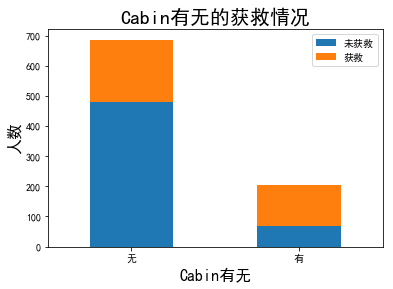

,未获救,获救
无,481,206
有,68,136


In [49]:
#分析cabin这个值的有无，对于survival的分布状况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({'有':Survived_cabin, '无':Survived_nocabin}).transpose()
df.columns=['未获救','获救']
df.plot(kind='bar', stacked=True)
plt.title("Cabin有无的获救情况",fontsize=20)
plt.xlabel("Cabin有无",fontsize=16) 
plt.ylabel("人数",fontsize=16)
plt.xticks(rotation=0)
plt.show()
df

有Cabin记录的似乎获救概率稍高一些

## 数据预处理

In [50]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 数据缺失值处理

In [53]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
#补充Age的缺失值
data_train['Age']=data_train['Age'].fillna(data_train['Age'].mean())
#按Cabin有无数据，将这个属性处理成Yes和No两种类型
def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df
data_train = set_Cabin_type(data_train)

In [5]:
#对Embarked进行填充数据
data_train['Embarked']=data_train['Embarked'].fillna('S')

In [6]:
data_train.head(10)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [57]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


## 数据one-hot处理

因为逻辑回归建模时，需要输入的特征都是数值型特征，我们通常会先对类目型的特征因子化/one-hot编码<br>
什么叫做因子化/one-hot编码？举个例子<br>
以Embarked为例，原本一个属性维度，因为其取值可以是[‘S’,’C’,’Q‘]，而将其平展开为’Embarked_C’,’Embarked_S’, ‘Embarked_Q’三个属性<br>
* 原本Embarked取值为S的，在此处的”Embarked_S”下取值为1，在’Embarked_C’, ‘Embarked_Q’下取值为0<br>
* 原本Embarked取值为C的，在此处的”Embarked_C”下取值为1，在’Embarked_S’, ‘Embarked_Q’下取值为0<br>
* 原本Embarked取值为Q的，在此处的”Embarked_Q”下取值为1，在’Embarked_C’, ‘Embarked_S’下取值为0<br>
* 我们使用pandas的”get_dummies”来完成这个工作，并拼接在原来的”data_train”之上<br>

In [7]:
# 因为逻辑回归建模时，需要输入的特征都是数值型特征
# 我们先对类目型的特征离散/因子化
# 以Cabin为例，原本一个属性维度，因为其取值可以是['yes','no']，而将其平展开为'Cabin_yes','Cabin_no'两个属性
# 原本Cabin取值为yes的，在此处的'Cabin_yes'下取值为1，在'Cabin_no'下取值为0
# 原本Cabin取值为no的，在此处的'Cabin_yes'下取值为0，在'Cabin_no'下取值为1
# 我们使用pandas的get_dummies来完成这个工作，并拼接在原来的data_train之上，如下所示
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,29.699118,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


## 数据标准化处理

我们还得做一些处理，Age和Fare两个属性，乘客的数值幅度变化太大,进行标准差标准化处理

In [8]:
a=df.Age
df['Age_scaled'] = (a - a.mean()) / (a.std())
df=df.drop('Age',axis=1)
b=df.Fare
df['Fare_scaled'] = (b - b.mean()) / (b.std())
df=df.drop('Fare',axis=1)
df.head(10)

,PassengerId,Survived,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,-5.921480e-01,-0.502163
1,2,1,1,0,0,1,1,0,0,1,0,1,0,0,6.384304e-01,0.786404
2,3,1,0,0,1,0,0,0,1,1,0,0,0,1,-2.845034e-01,-0.488580
3,4,1,1,0,0,1,0,0,1,1,0,1,0,0,4.076970e-01,0.420494
4,5,0,0,0,1,0,0,0,1,0,1,0,0,1,4.076970e-01,-0.486064
5,6,0,0,0,1,0,0,1,0,0,1,0,0,1,4.371893e-15,-0.477848
6,7,0,0,0,0,1,0,0,1,0,1,1,0,0,1.869009e+00,0.395591
7,8,0,3,1,1,0,0,0,1,0,1,0,0,1,-2.130371e+00,-0.223957
8,9,1,0,2,1,0,0,0,1,1,0,0,0,1,-2.075923e-01,-0.424018
9,10,1,1,0,1,0,1,0,0,1,0,0,1,0,-1.207437e+00,-0.042931


## 数据建模--逻辑回归

我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模。

In [19]:
# 我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模
from sklearn import linear_model
import sklearn.model_selection as ms

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values
# y即Survival结果
y = train_np[:, 0]
# y
# X即特征属性值
X = train_np[:, 1:]
# fit到LogisticRegression之中
clf = linear_model.LogisticRegression(penalty='l1', tol=1e-4)
# clf.fit(X, y)  
# clf
# y
# X
# print("模型正确率："+str(clf.score(X,y)))

train_x,test_x,train_y,test_y=ms.train_test_split(X,y,test_size=0.25,random_state=7)
print(ms.cross_val_score(clf,train_x,train_y,cv=5,scoring='f1_weighted').mean())
clf.fit(X, y) 

0.8139827547425945


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

penalty：惩罚项，str类型，可选参数为l1和l2，默认为l2。用于指定惩罚项中使用的规范。newton-cg、sag和lbfgs求解算法只支持L2规范。L1G规范假设的是模型的参数满足拉普拉斯分布，L2假设的模型参数满足高斯分布，所谓的范式就是加上对参数的约束，使得模型更不会过拟合(overfit)<br>
tol：停止求解的标准，float类型，默认为1e-4。就是求解到多少的时候，停止，认为已经求出最优解。<br>
c：正则化系数λ的倒数，float类型，默认为1.0。必须是正浮点型数。像SVM一样，越小的数值表示越强的正则化。<br>

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import sklearn.tree as st
import sklearn.model_selection as ms
import sklearn.metrics as sm

train_x,test_x,train_y,test_y=ms.train_test_split(X,y,test_size=0.3,random_state=7)

#使用随机森林分类器
model1 = RandomForestClassifier(random_state=1,max_depth=5,n_estimators = 300,min_samples_split=2,min_samples_leaf=2)
print(ms.cross_val_score(model1,train_x,train_y,cv=5,scoring='f1_weighted').mean())
model1.fit(X, y)

#使用AdaBoost分类器
model2=AdaBoostClassifier(st.DecisionTreeClassifier(max_depth=10),n_estimators=300,random_state=7)
print(ms.cross_val_score(model2,train_x,train_y,cv=5,scoring='f1_weighted').mean())
model2.fit(X, y)

0.834122973878633
0.8071757660912219


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=300, random_state=7)

In [34]:
fi=model1.feature_importances_
fn=train_df.columns[1:]
print(fi,fn)

[0.03072448 0.02431521 0.04438406 0.04512395 0.01012711 0.00558785
 0.01353459 0.25989223 0.26034944 0.03875004 0.02279011 0.07690081
 0.07167746 0.09584266] Index(['SibSp', 'Parch', 'Cabin_No', 'Cabin_Yes', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Age_scaled', 'Fare_scaled'],
      dtype='object')


([<matplotlib.axis.XTick at 0xc95aa4d518>,
 <a list of 14 Text xticklabel objects>)

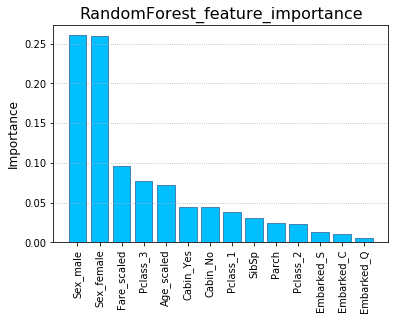

In [40]:
import matplotlib.pyplot as plt
plt.title('RandomForest_feature_importance',fontsize=16)
plt.ylabel('Importance',fontsize=12)
plt.tick_params(labelsize=10)
plt.grid(axis='y',linestyle=":")
sorted_indices=fi.argsort()[::-1]
pos=np.arange(sorted_indices.size)
plt.bar(pos,fi[sorted_indices],facecolor='deepskyblue',edgecolor='steelblue')
plt.xticks(pos,fn[sorted_indices],rotation=90)

接下来咱们对训练集和测试集做一样的操作

In [12]:
# 读取测试集数据
data_test = pd.read_csv("test.csv")
data_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [13]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
data_test = pd.read_csv("test.csv")
# 接着我们对test_data做和train_data中一致的特征变换
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
#补充Age的缺失值
data_test['Age']=data_test['Age'].fillna(data_test['Age'].mean())
#按Cabin有无数据，将这个属性处理成Yes和No两种类型
def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df
data_train = set_Cabin_type(data_test)

# one-hot编码
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

# 标准化处理数据
a=df_test.Age
df_test['Age_scaled'] = (a - a.mean()) / (a.std())
df_test=df_test.drop('Age',axis=1)
b=df_test.Fare
df_test['Fare_scaled'] = (b - b.mean()) / (b.std())
df_test=df_test.drop('Fare',axis=1)
df_test.head(10)

,PassengerId,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,0,0,1,0,0,1,0,0,1,0,0,1,0.334592,-0.496043
1,893,1,0,1,0,0,0,1,1,0,0,0,1,1.323944,-0.510885
2,894,0,0,1,0,0,1,0,0,1,0,1,0,2.511166,-0.462780
3,895,0,0,1,0,0,0,1,0,1,0,0,1,-0.259019,-0.481127
4,896,1,1,1,0,0,0,1,1,0,0,0,1,-0.654760,-0.416242
5,897,0,0,1,0,0,0,1,0,1,0,0,1,-1.287945,-0.471059
6,898,0,0,1,0,0,1,0,1,0,0,0,1,-0.021575,-0.499623
7,899,1,1,1,0,0,0,1,0,1,0,1,0,-0.338168,-0.117097
8,900,0,0,1,0,1,0,0,1,0,0,0,1,-0.971353,-0.506782
9,901,2,0,1,0,0,0,1,0,1,0,0,1,-0.733908,-0.203910


In [20]:
# from sklearn.metrics import accuracy_score 
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions0 = clf.predict(test)
predictions1 = model1.predict(test)
predictions2 = model2.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived_L':predictions0.astype(np.int32),'Survived_R':predictions1.astype(np.int32),'Survived_A':predictions2.astype(np.int32)})
result.to_csv("predictions.csv", index=False)

In [21]:
pd.read_csv("predictions.csv").head(20)

,PassengerId,Survived_A,Survived_L,Survived_R
0,892,0,0,0
1,893,0,0,0
2,894,1,0,0
3,895,0,0,0
4,896,0,1,0
5,897,0,0,0
6,898,0,1,1
7,899,0,0,0
8,900,1,1,1
9,901,0,0,0
